In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('Data_Set.csv')
df.shape

(148541, 11)

In [75]:
pd.options.display.float_format = '{:.2f}'.format

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148541 entries, 0 to 148540
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148541 non-null  int64 
 1   name          148455 non-null  object
 2   city          148541 non-null  object
 3   rating        148455 non-null  object
 4   rating_count  148455 non-null  object
 5   cost          148410 non-null  object
 6   cuisine       148442 non-null  object
 7   lic_no        148312 non-null  object
 8   link          148541 non-null  object
 9   address       148455 non-null  object
 10  menu          148541 non-null  object
dtypes: int64(1), object(10)
memory usage: 12.5+ MB


In [77]:
# droping columns which do not need to be used in analysis
df_head = df.copy()
df_head = df_head.drop(['id','lic_no','link','menu','address'], axis=1)
df_head.head()

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


In [78]:
df_head.shape

(148541, 6)

In [79]:
df_head.head()

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,--,Too Few Ratings,₹ 200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.4,50+ ratings,₹ 200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.8,100+ ratings,₹ 100,Beverages
3,Singh Hut,Abohar,3.7,20+ ratings,₹ 250,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,--,Too Few Ratings,₹ 250,"Italian-American,Fast Food"


In [80]:
#cleaning the numerical columns
#Rating Column
df_r = df_head.copy()
df_r['rating'].unique()

array(['--', '4.4', '3.8', '3.7', '3.6', '4.0', '4.2', '4.7', '4.1',
       '3.5', '3.1', '3.4', '3.3', '4.8', '3.9', '2.7', '4.3', '2.9',
       '4.5', '2.5', '3.2', '2.4', '4.6', '3.0', '2.8', '2.3', '5.0',
       '2.6', '2.2', '1.4', '1.9', '4.9', '2.1', '1.3', '2.0', '1.8',
       '1.6', '1.1', '1.5', nan, '1.0', '1.2', '1.7'], dtype=object)

In [81]:
# replacing "--"" with nan
df_r['rating'] = df_r['rating'].replace('--', np.nan)
df_r['rating'] = df_r['rating'].astype(float)

In [82]:
df_r.isna().sum()

name               86
city                0
rating          87100
rating_count       86
cost              131
cuisine            99
dtype: int64

In [83]:
#rating_count column cleaning
df_rc = df_r.copy()

In [84]:
df_rc['rating_count'].unique()

array(['Too Few Ratings', '50+ ratings', '100+ ratings', '20+ ratings',
       '500+ ratings', '1K+ ratings', '5K+ ratings', nan, '10K+ ratings'],
      dtype=object)

In [85]:
df_rc['rating_count'] = (df_rc['rating_count'].str.replace('+ ratings', '', regex=False)
                         .str.replace('K', '000', regex=False).str.extract(r'(\d+)'))

df_rc['rating_count'] = df_rc['rating_count'].astype(float)

In [86]:
df_rc.head(3)

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,NaN,NaN,₹ 200,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.40,50.00,₹ 200,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.80,100.00,₹ 100,Beverages


In [87]:
df_rc['rating_count'].unique()

array([   nan,    50.,   100.,    20.,   500.,  1000.,  5000., 10000.])

In [88]:
#Cleaning cost feature

df_co = df_rc.copy()

In [89]:
df_co['cost'] = df_co['cost'].str.replace("₹ ", "")
df_co['cost'] = df_co['cost'].astype(float)

In [90]:
df_co.isna().sum()

name               86
city                0
rating          87100
rating_count    87100
cost              131
cuisine            99
dtype: int64

In [158]:
# Since we have only one value is more than 10000 and == 1, just remove that value

df_co = df_co.loc[(df_co['cost'] <= 10000) & (df_co['cost'] != 1)]

In [159]:
# dropping the nan values
df_drop = df_co.copy()
df_drop.dropna(subset= ['name','cost','cuisine'], inplace=True)

In [160]:
df_drop.isna().sum()

name                0
city                0
rating          86930
rating_count    86930
cost                0
cuisine             0
dtype: int64

In [161]:
df_drop.shape

(148340, 6)

In [162]:
df_drop

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,NaN,NaN,200.00,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.40,50.00,200.00,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.80,100.00,100.00,Beverages
3,Singh Hut,Abohar,3.70,20.00,250.00,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,NaN,NaN,250.00,"Italian-American,Fast Food"
...,...,...,...,...,...,...
148536,The Food Delight,Yavatmal,NaN,NaN,200.00,"Fast Food,Snacks"
148537,MAITRI FOODS & BEVERAGES,Yavatmal,NaN,NaN,300.00,Pizzas
148538,Cafe Bella Ciao,Yavatmal,NaN,NaN,300.00,"Fast Food,Snacks"
148539,GRILL ZILLA,Yavatmal,NaN,NaN,250.00,Continental


In [163]:
# filling NaN for rating feature

df_fill = df_drop.copy()
mean_rating = df_fill[df_fill['rating']!=0]['rating'].mean()
df_fill['rating'] = df_fill['rating'].fillna(mean_rating)

In [164]:
# replacing the NaN value 

median_rc = df_fill[df_fill['rating_count']!=0]['rating_count'].median()
df_fill['rating_count'] = df_fill['rating_count'].fillna(median_rc)

In [165]:
df_fill.isna().sum()

name            0
city            0
rating          0
rating_count    0
cost            0
cuisine         0
dtype: int64

In [166]:
#Segregating the categorical features

df_fill.columns

Index(['name', 'city', 'rating', 'rating_count', 'cost', 'cuisine'], dtype='object')

In [167]:
df_fill.head()

,name,city,rating,rating_count,cost,cuisine
0,AB FOODS POINT,Abohar,3.89,50.00,200.00,"Beverages,Pizzas"
1,Janta Sweet House,Abohar,4.40,50.00,200.00,"Sweets,Bakery"
2,theka coffee desi,Abohar,3.80,100.00,100.00,Beverages
3,Singh Hut,Abohar,3.70,20.00,250.00,"Fast Food,Indian"
4,GRILL MASTERS,Abohar,3.89,50.00,250.00,"Italian-American,Fast Food"


In [168]:
#Splitting the city feature to specific place in the city

df_city = df_fill.copy()

In [169]:
df_city[['city_area', 'main_city']] = df_city['city'].str.split(',', n=1, expand=True)

df_city['city_area'] = df_city['city_area'].str.strip()
df_city['main_city'] = df_city['main_city'].str.strip()

df_city.loc[df_city['main_city'].isna(), 'main_city'] = df_city['city_area']
df_city.loc[df_city['city_area'] == df_city['main_city'], 'city_area'] = None

In [170]:
df_city['city_area'] = df_city['city_area'].replace('Sanjay Nagar','New BEL Road,Sanjay Nagar')
df_city['main_city'] = df_city['main_city'].replace('New BEL Road,Bangalore','Bangalore')
df_city['city_area'] = df_city['city_area'].replace('Tarnaka','Tarnaka Nacharam & Malkajigiri')
df_city['main_city'] = df_city['main_city'].replace('Nacharam & Malkajigiri,Hyderabad','Hyderabad')

In [171]:
df_city.head()

,name,city,rating,rating_count,cost,cuisine,city_area,main_city
0,AB FOODS POINT,Abohar,3.89,50.00,200.00,"Beverages,Pizzas",None,Abohar
1,Janta Sweet House,Abohar,4.40,50.00,200.00,"Sweets,Bakery",None,Abohar
2,theka coffee desi,Abohar,3.80,100.00,100.00,Beverages,None,Abohar
3,Singh Hut,Abohar,3.70,20.00,250.00,"Fast Food,Indian",None,Abohar
4,GRILL MASTERS,Abohar,3.89,50.00,250.00,"Italian-American,Fast Food",None,Abohar


In [172]:
#Dropping the city since it has already been seperated

df_city = df_city.drop('city', axis=1)

In [173]:
df_city.head(3)

,name,rating,rating_count,cost,cuisine,city_area,main_city
0,AB FOODS POINT,3.89,50.00,200.00,"Beverages,Pizzas",None,Abohar
1,Janta Sweet House,4.40,50.00,200.00,"Sweets,Bakery",None,Abohar
2,theka coffee desi,3.80,100.00,100.00,Beverages,None,Abohar


In [174]:
# #Splitting the city feature to specific place in the city

df_cuisine = df_city.copy()

In [176]:
# Drop the row where cuisine has placed as '8:15 To 11:30 Pm'

df_cuisine = df_cuisine[df_cuisine['cuisine'] != '8:15 To 11:30 Pm']

In [177]:
df_cuisine[['Item', 'main_cuisine']] = df_cuisine['cuisine'].str.split(',', n=1, expand=True)

df_cuisine['Item'] = df_cuisine['Item'].str.strip()
df_cuisine['main_cuisine'] = df_cuisine['main_cuisine'].str.strip()

df_cuisine.loc[df_cuisine['main_cuisine'].isna(), 'main_cuisine'] = df_cuisine['Item']
df_cuisine.loc[df_cuisine['Item'] == df_cuisine['main_cuisine'], 'Item'] = None


In [178]:
df_cuisine = df_cuisine.drop('cuisine', axis=1)

In [179]:
df_cuisine.head(3)

,name,rating,rating_count,cost,city_area,main_city,Item,main_cuisine
0,AB FOODS POINT,3.89,50.00,200.00,None,Abohar,Beverages,Pizzas
1,Janta Sweet House,4.40,50.00,200.00,None,Abohar,Sweets,Bakery
2,theka coffee desi,3.80,100.00,100.00,None,Abohar,None,Beverages


In [181]:
# Renaming the splitted features

df_cuisine = df_cuisine.rename(columns={'main_city': 'city', 'city_area':'Area','main_cuisine':'cuisine'})

In [182]:
df_cuisine.head(3)

,name,rating,rating_count,cost,Area,city,Item,cuisine
0,AB FOODS POINT,3.89,50.00,200.00,None,Abohar,Beverages,Pizzas
1,Janta Sweet House,4.40,50.00,200.00,None,Abohar,Sweets,Bakery
2,theka coffee desi,3.80,100.00,100.00,None,Abohar,None,Beverages


In [183]:
# Rearranging the features

df_cuisine = df_cuisine[['name', 'Area', 'city', 'rating', 'rating_count', 'cost', 'Item', 'cuisine']]

In [ ]:
# Nan values

df_eda = df_cuisine.copy()

In [185]:
df_eda.head(2)

,name,Area,city,rating,rating_count,cost,Item,cuisine
0,AB FOODS POINT,None,Abohar,3.89,50.00,200.00,Beverages,Pizzas
1,Janta Sweet House,None,Abohar,4.40,50.00,200.00,Sweets,Bakery


In [189]:
df_eda.replace({None: np.nan}, inplace=True)

In [190]:
df_eda['Area'] = df_eda['Area'].fillna('Only city')

In [191]:
df_eda.head(3)

,name,Area,city,rating,rating_count,cost,Item,cuisine
0,AB FOODS POINT,Only city,Abohar,3.89,50.00,200.00,Beverages,Pizzas
1,Janta Sweet House,Only city,Abohar,4.40,50.00,200.00,Sweets,Bakery
2,theka coffee desi,Only city,Abohar,3.80,100.00,100.00,NaN,Beverages


In [192]:
df_eda['Item'] = df_eda['Item'].fillna('Only cuisine')

In [193]:
df_eda

,name,Area,city,rating,rating_count,cost,Item,cuisine
0,AB FOODS POINT,Only city,Abohar,3.89,50.00,200.00,Beverages,Pizzas
1,Janta Sweet House,Only city,Abohar,4.40,50.00,200.00,Sweets,Bakery
2,theka coffee desi,Only city,Abohar,3.80,100.00,100.00,Only cuisine,Beverages
3,Singh Hut,Only city,Abohar,3.70,20.00,250.00,Fast Food,Indian
4,GRILL MASTERS,Only city,Abohar,3.89,50.00,250.00,Italian-American,Fast Food
...,...,...,...,...,...,...,...,...
148536,The Food Delight,Only city,Yavatmal,3.89,50.00,200.00,Fast Food,Snacks
148537,MAITRI FOODS & BEVERAGES,Only city,Yavatmal,3.89,50.00,300.00,Only cuisine,Pizzas
148538,Cafe Bella Ciao,Only city,Yavatmal,3.89,50.00,300.00,Fast Food,Snacks
148539,GRILL ZILLA,Only city,Yavatmal,3.89,50.00,250.00,Only cuisine,Continental


In [194]:
df_eda.to_csv('Cleaned.csv', index=False)

Text(0, 0.5, 'frequency')

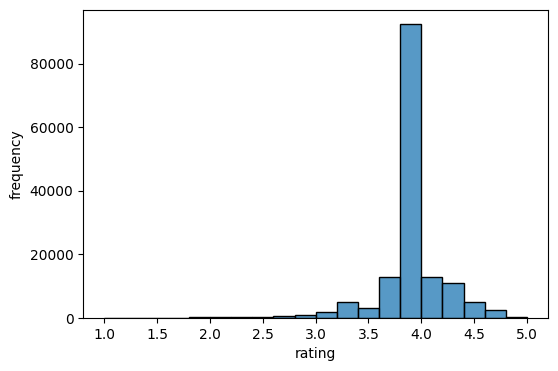

In [195]:
# Exploratory Data Analysis

plt.figure(figsize=(6,4))
sns.histplot(df_eda['rating'], bins=20)
plt.xlabel('rating')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

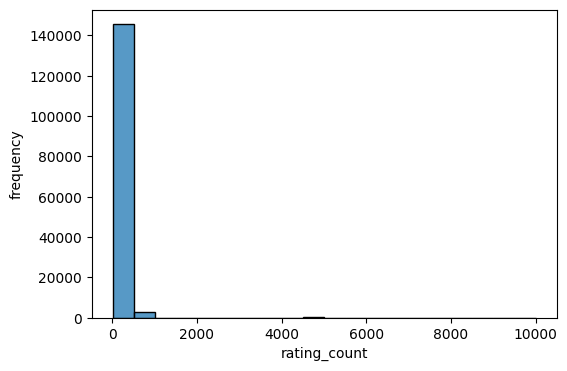

In [197]:
# Exploratory Data Analysis

plt.figure(figsize=(6,4))
sns.histplot(df_eda['rating_count'], bins=20)
plt.xlabel('rating_count')
plt.ylabel('frequency')

Text(0, 0.5, 'frequency')

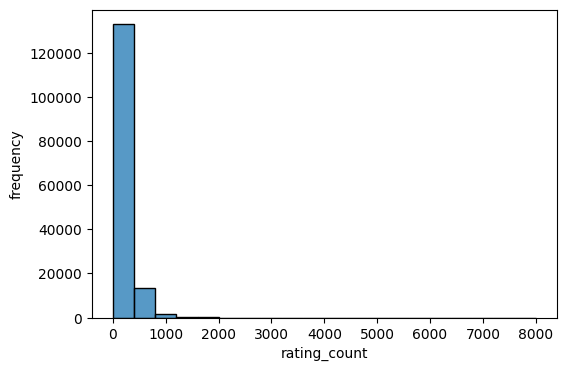

In [198]:
# Exploratory Data Analysis

plt.figure(figsize=(6,4))
sns.histplot(df_eda['cost'], bins=20)
plt.xlabel('rating_count')
plt.ylabel('frequency')

In [199]:
df_enc = pd.read_csv('Cleaned.csv')

In [200]:
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148332 entries, 0 to 148331
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          148332 non-null  object 
 1   Area          148332 non-null  object 
 2   city          148332 non-null  object 
 3   rating        148332 non-null  float64
 4   rating_count  148332 non-null  float64
 5   cost          148332 non-null  float64
 6   Item          148332 non-null  object 
 7   cuisine       148332 non-null  object 
dtypes: float64(3), object(5)
memory usage: 9.1+ MB


In [201]:
cat_cols = df_enc.select_dtypes(include='object').columns

for col in cat_cols:
    print(col, df_enc[col].nunique())

name 112717
Area 295
city 552
Item 107
cuisine 122


In [202]:
import pandas as pd
import pickle
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans

#Loading clean data

df = pd.read_csv("Cleaned.csv")

# One hot encoder

cat_cols = ["Area", "city", "Item", "cuisine"]

encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(df[cat_cols])

# Save encoder
pickle.dump(encoder, open("encoder.pkl", "wb"))

#Transforming the encoder

encoded_array = encoder.transform(df[cat_cols])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out())

# Save encoded.csv
encoded_df.to_csv("encoded.csv", index=False)

#Saving the encoded feature

scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded_df)

# Save scaler.pkl
pickle.dump(scaler, open("scaler.pkl", "wb"))


#Trainig the features for Kmeans model

kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# Save KMeans model
pickle.dump(kmeans, open("kmeans_model.pkl", "wb"))


# Attaching the clusters to the cleaned data


df["cluster"] = kmeans.labels_

df.to_csv("cleaned_with_clusters.csv", index=False)
print("cleaned_with_clusters.csv saved.")


cleaned_with_clusters.csv saved.


In [203]:
# Loading the encoded data
df_encoded = pd.read_csv("encoded.csv")

# Ensure no unwanted columns accidentally appear
drop_cols = [col for col in df_encoded.columns if col.lower() == ["name", "address"]]
if drop_cols:
    df_encoded = df_encoded.drop(columns=drop_cols)

# Scaling the encoded features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# Save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Kmeans model
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)

# Save KMeans model
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

# Loading the cleaned data

df_clean = pd.read_csv("Cleaned.csv")

df_clean["cluster"] = kmeans.labels_

# Save final file
df_clean.to_csv("cleaned_with_clusters.csv", index=False)

print("KMeans training completed successfully.")

KMeans training completed successfully.
